In [6]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [9]:
def anisdiff_bw(U, N, lam, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #pad U
    U = np.pad(U,1,mode='edge')
    #use the update procedure
    for i in range(N):
        U = U + lam*((g(np.abs(np.roll(U,1,axis=0)-U))*(np.roll(U,1,axis=0)-U))
                    + (g(np.abs(np.roll(U,-1,axis=0)-U))*(np.roll(U,-1,axis=0)-U))
                    + (g(np.abs(np.roll(U,1,axis=1)-U))*(np.roll(U,1,axis=1)-U))
                    + (g(np.abs(np.roll(U,-1,axis=1)-U))*(np.roll(U,-1,axis=1)-U)))
    #remove the pad before returning
    return U[1:-1, 1:-1]

/var/folders/5r/5n4nm5w14254l_1t_2lqx2nh0000gn/T/ipykernel_51841/3768690088.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  picture = imread('balloon.jpg', as_gray=True) * 1./255


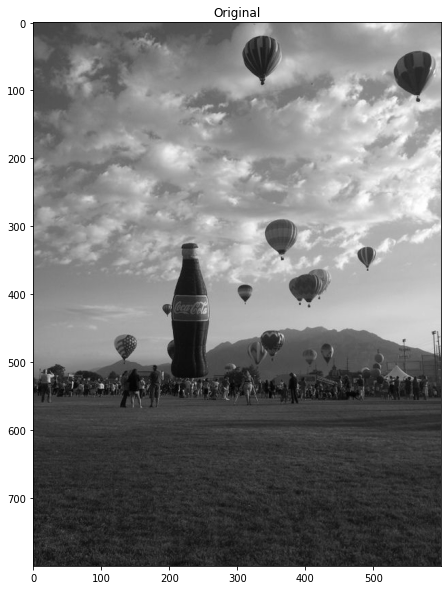

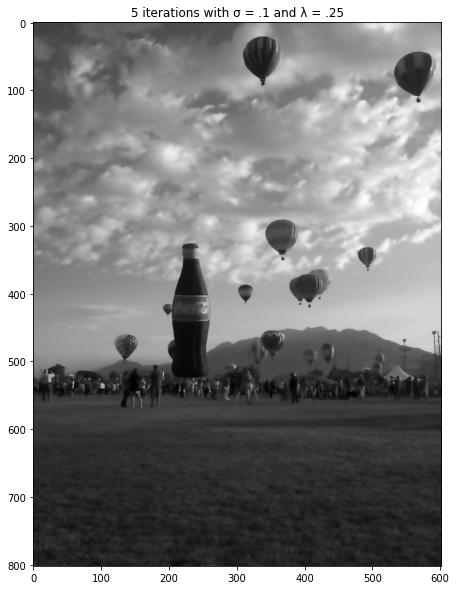

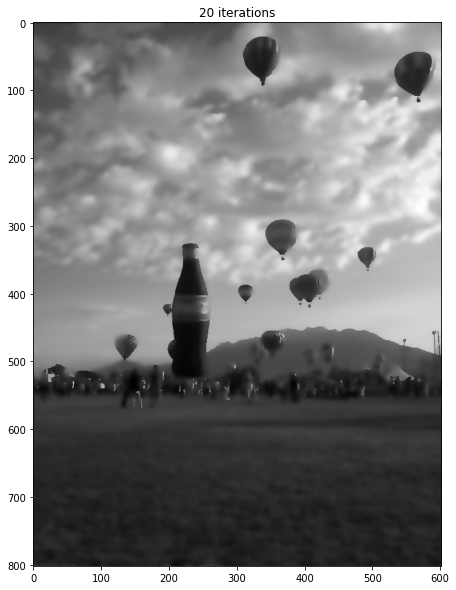

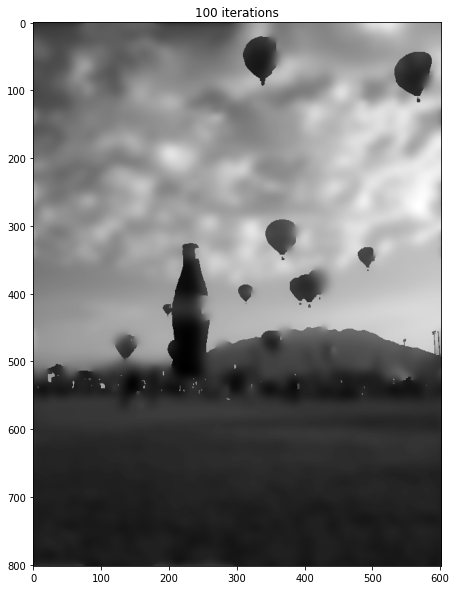

In [13]:
# To read in an image, convert it to grayscale, and rescale it.
picture = imread('balloon.jpg', as_gray=True) * 1./255

#define our parameters
sig = .1
lam = .25
N = [5,20,100]

#define g
g = lambda x: np.exp(-(x/sig)**2)

#implement the diffusion algorithm for the different iteration numbers
diff1 = anisdiff_bw(picture, N[0], lam, g)
diff2 = anisdiff_bw(picture, N[1], lam, g)
diff3 = anisdiff_bw(picture, N[2], lam, g)

#To display the picture as grayscale
plt.imshow(picture, cmap=cm.gray)
plt.title('Original')
plt.show()
plt.imshow(diff1, cmap=cm.gray)
plt.title('5 iterations with σ = .1 and λ = .25')
plt.show()
plt.imshow(diff2, cmap=cm.gray)
plt.title('20 iterations')
plt.show()
plt.imshow(diff3, cmap=cm.gray)
plt.title('100 iterations')
plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [29]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #define the norm function
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    
    #add the pads to U
    U = np.pad(U,1,mode='edge')
    
    #use the update algorithm
    for i in range(N):
        U = U + lam*((g(norm(np.roll(U,1,axis=0)-U))*(np.roll(U,1,axis=0)-U))
                    + (g(norm(np.roll(U,-1,axis=0)-U))*(np.roll(U,-1,axis=0)-U))
                    + (g(norm(np.roll(U,1,axis=1)-U))*(np.roll(U,1,axis=1)-U))
                    + (g(norm(np.roll(U,-1,axis=1)-U))*(np.roll(U,-1,axis=1)-U)))
    #remove the pad before returning
    return U[1:-1, 1:-1, 1:-1]

/var/folders/5r/5n4nm5w14254l_1t_2lqx2nh0000gn/T/ipykernel_51841/3088309867.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  picture = imread('balloons_color.jpg', as_gray=False) * 1./255


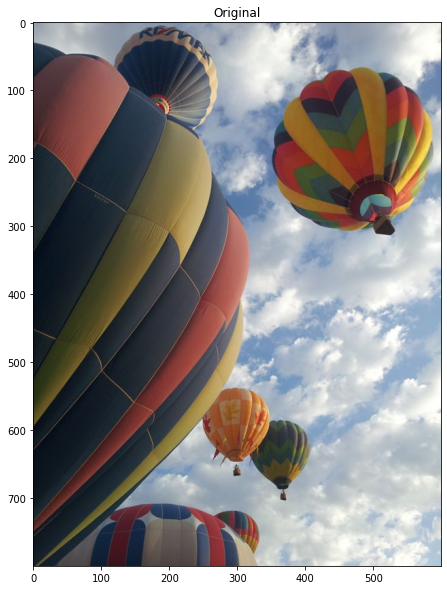

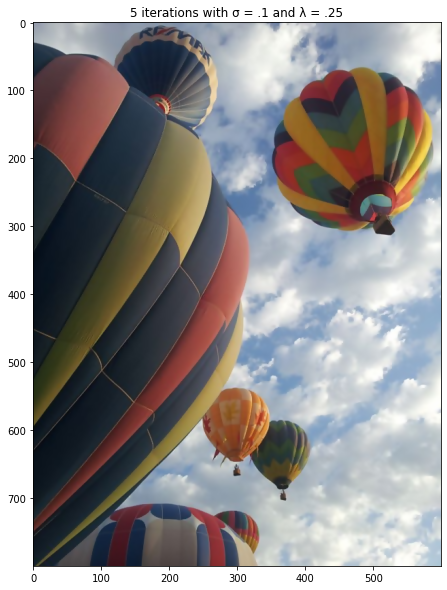

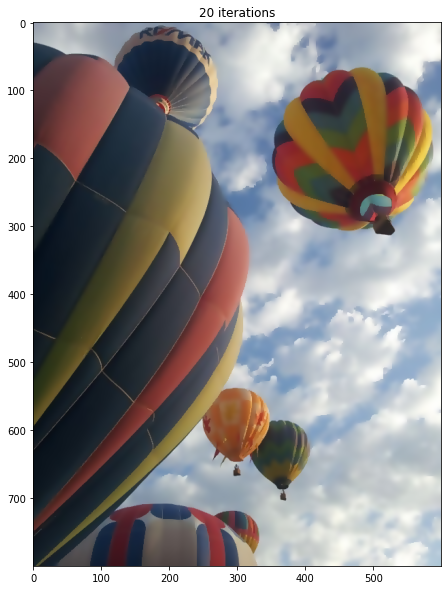

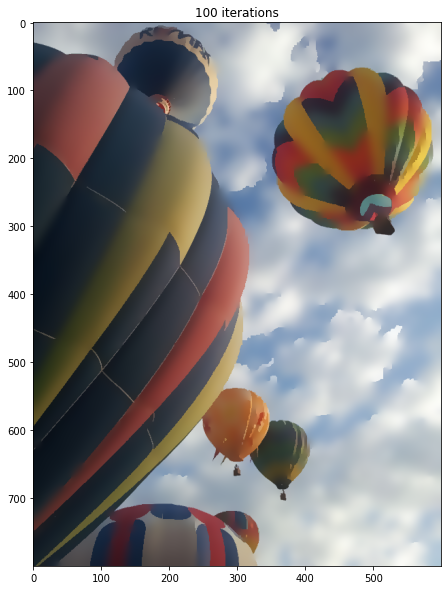

In [31]:
picture = imread('balloons_color.jpg', as_gray=False) * 1./255

#define our parameters
sig = .1
lam = .25
N = [5,20,100]
g = lambda x: np.exp(-(x/sig)**2)

#use the diffusion algorithm for multiple numbers of iterations
diff1 = anisdiff_color(picture, N[0], lam, g)
diff2 = anisdiff_color(picture, N[1], lam, g)
diff3 = anisdiff_color(picture, N[2], lam, g)

#plot the different images
plt.imshow(picture)
plt.title('Original')
plt.show()
plt.imshow(diff1)
plt.title('5 iterations with σ = .1 and λ = .25')
plt.show()
plt.imshow(diff2)
plt.title('20 iterations')
plt.show()
plt.imshow(diff3)
plt.title('100 iterations')
plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

/var/folders/5r/5n4nm5w14254l_1t_2lqx2nh0000gn/T/ipykernel_51841/3670697094.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  og = imread('balloon.jpg', as_gray=True)
/var/folders/5r/5n4nm5w14254l_1t_2lqx2nh0000gn/T/ipykernel_51841/3670697094.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('balloon.jpg', as_gray=True)


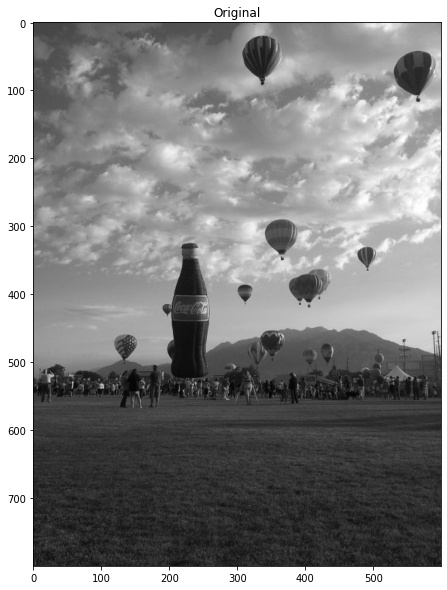

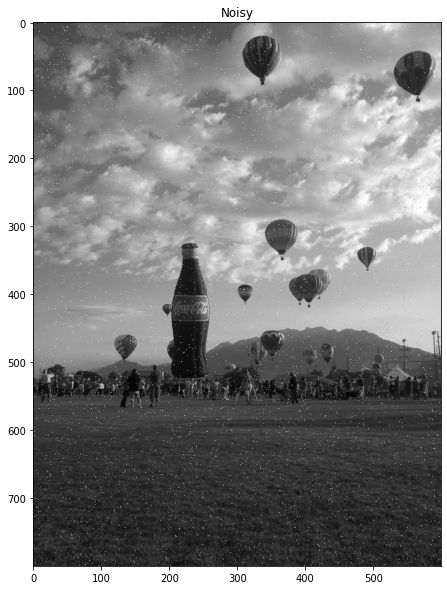

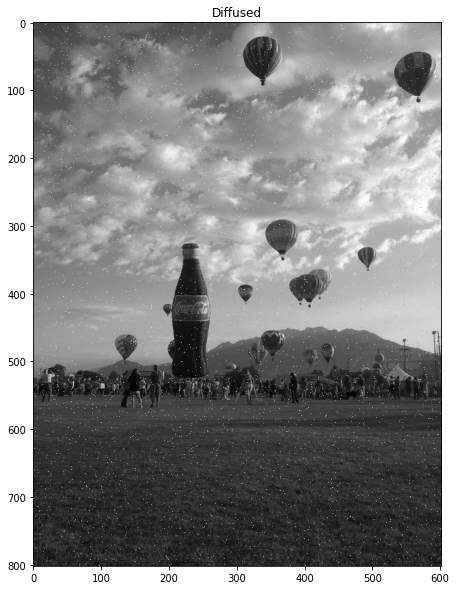

In [33]:
#get the original and noisy image
og = imread('balloon.jpg', as_gray=True)
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)

#define our parameters
sig = .1
lam = .25
N = 20

#define our g function
g = lambda x: np.exp(-(x/sig)**2)

#use our diffusion algorithm
diff1 = anisdiff_bw(image, N, lam, g)

#To display the picture as grayscale
plt.imshow(og, cmap=cm.gray)
plt.title('Original')
plt.show()
plt.imshow(image, cmap=cm.gray)
plt.title('Noisy')
plt.show()
plt.imshow(diff1, cmap=cm.gray)
plt.title('Diffused')
plt.show()

Anisotropic diffusion does not smooth out the noise because there is just too much noise in this case, and there is no particular area to smooth over relative to the rest of the photo. The whole thing is noisey. 